In [25]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Use ridge regression with different lambdas and poly degrees to make the predictions

In [374]:
from proj1_helpers import *
from helpers import *
from implementations import *

In [357]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [531]:
from plots import cross_validation_visualization
from build_polynomial import *

def cross_validation_demo(poly_degree):
    seed = 1
    degree = poly_degree
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas = np.logspace(-2, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te,degree)

In [365]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    w = ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_loss(y_te, tx_te, w))
    return loss_tr, loss_te,w

In [600]:
y_data,x_data,ind=load_csv_data('data/train.csv/train.csv')

In [601]:

#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,13,14,16,17,19,21,22,29]] # without phi
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29]] # wihtout -999
X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18
#X=x_data

#y_samp, x_samp = sample_data(y_data, X, 1, size_samples=10000)
y_samp =y_data
x_samp = X
#x_samp, mean_x, std_x = standardize(x_samp)
x_samp, mean_x, std_x=standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))

y = np.expand_dims(y_samp, axis=1)
print(tx.shape)
print(y.shape)
print(initial_w.shape)


(250000, 29)
(250000, 1)
(29, 1)


In [159]:
w = least_squares(y, tx)
print(w)

[[-0.3182    ]
 [-0.18571988]
 [-0.05969809]
 [ 0.12311766]
 [ 0.17967083]
 [-0.07107879]
 [ 0.09210555]
 [-0.13458083]
 [ 0.1115657 ]]


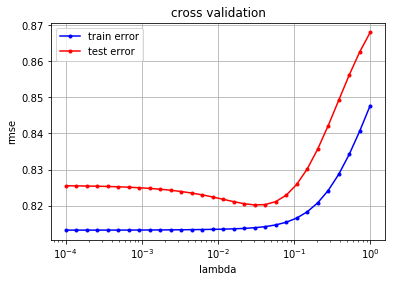

In [223]:
cross_validation_demo(5) # poly 5 derived data


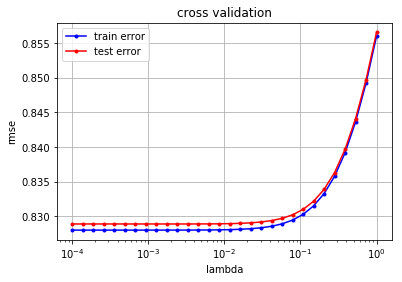

In [224]:
cross_validation_demo(3) #poly 3 derived data

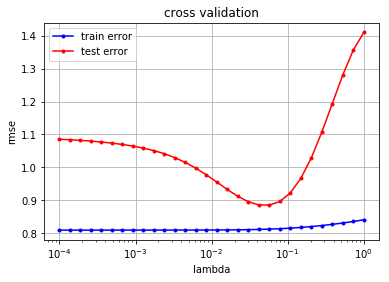

In [225]:
cross_validation_demo(7)#poly 7 derived data

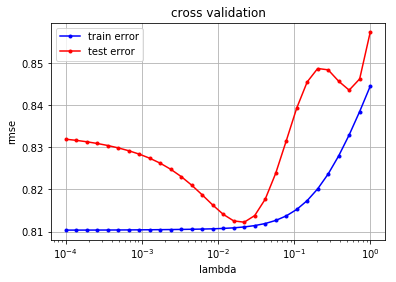

In [226]:
cross_validation_demo(6)#poly 6 derived data

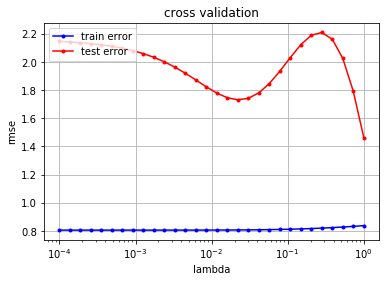

In [227]:
cross_validation_demo(8)#poly 8 computed data

In [ ]:
#FULL data features with prePro

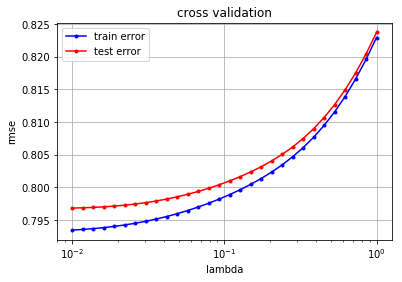

In [529]:

cross_validation_demo(2)#poly 3 computed Full data



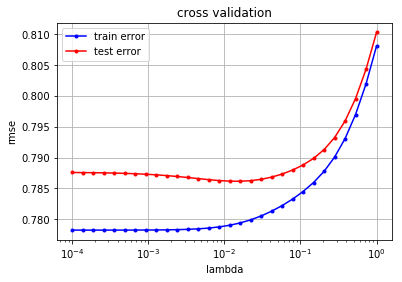

In [533]:

cross_validation_demo(3)#poly 3 computed Full data



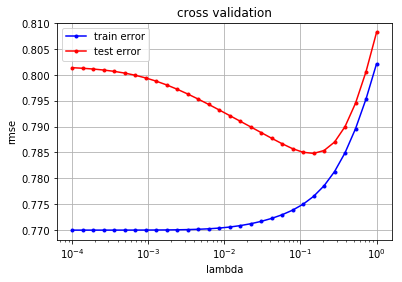

In [532]:
cross_validation_demo(4)#poly 3 computed Full data


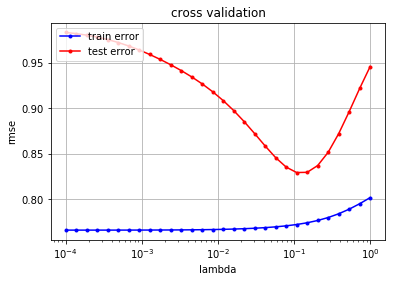

In [534]:
cross_validation_demo(5)#poly 3 computed Full data


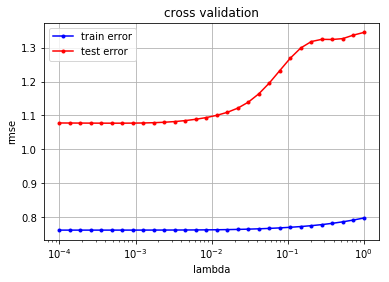

In [535]:
cross_validation_demo(6)#poly 3 computed Full data



In [257]:
tx_tr = build_poly(tx, 6) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))# first submsision

array([ 113116.])

In [282]:
tx_tr = build_poly(tx, 6) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.002)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#2nd submission 

array([ 112932.])

In [304]:
tx_tr = build_poly(tx, 6) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.002)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#4th submission 

array([ 107874.])

In [327]:
tx_tr = build_poly(tx, 3) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)

sum(abs(y_prime-y))#5th submission 

array([ 115744.])

In [537]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#9th sub B

array([ 20108.])

In [521]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features no prepro
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#7th submission 

array([ 101998.])

In [596]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))

array([ 101998.])

In [155]:
gamma = 0.01
max_iter = 100

In [598]:
polyN = 5
tx_tr = build_poly(tx, polyN) # ridge | poly 5| lambda 0.0001|all features w0 11 &18|prepro Nan
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))# 12th submission

array([ 102004.])

In [604]:
polyN = 6
tx_tr = build_poly(tx, polyN) # ridge | poly 6| lambda 0.0001|all features w0 11 &18|prepro Nan
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))# 12th submission

array([ 101020.])

In [599]:
#create subsmission with the previous computed w should take the features accordingly
y_data,x_data,ind=load_csv_data('data/test.csv/test.csv')
#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # all data
#X=x_data[:,13:22] # computed data
X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without phi
#X=x_data
y_samp =y_data
x_samp = X
x_samp, mean_x, std_x = standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))
y = np.expand_dims(y_samp, axis=1)
tx_tr = build_poly(tx, polyN) # full set 250K
y_prime = predict_labels(w,tx_tr)
create_csv_submission(ind, y_prime, 'data/sample-submission.csv')

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


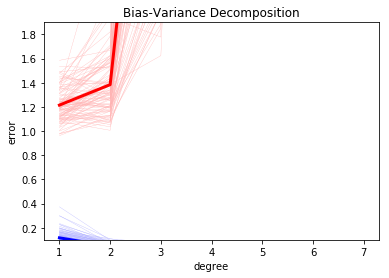

In [555]:
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = x_samp.shape[0]
    ratio_train = 0.001
    degrees = range(1, 8)
    #best_lambda = 0.001
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    degrees_lambda = np.empty((len(seeds), len(degrees)))

    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        #x = np.linspace(0.1, 2 * np.pi, num_data)
        #y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        x = x_samp
        y = y_samp
        # split data with a specific seed
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio_train, seed)
        
        for index_degree, degree in enumerate(degrees):
            # least square
           # w = least_squares(y_tr, tx_tr)
            #######################
           # best_lambda=find_best_lambdas_with_CV(x_tr,y_tr,degree)
            best_lambda = 0.1
            #################3
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            w= ridge_regression(y_tr, tx_tr, best_lambda)
            # calculate the rmse for train and test
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
            rmse_te[index_seed, index_degree] = np.sqrt(2 * compute_loss(y_te, tx_te, w))
            degrees_lambda[index_seed, index_degree] = best_lambda
    lambdas_mean = np.expand_dims(np.mean(degrees_lambda, axis=0), axis=0)
    print(lambdas_mean)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
bias_variance_demo()


In [404]:
def find_best_lambdas_with_CV(x_tr,y_tr,degree):
    
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
            # split data in k fold
    k_indices = build_k_indices(y_tr, k_fold, 1)
            # define lists to store the loss of training data and test data
            #rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        #rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y_tr, x_tr, k_indices, k, lambda_, degree)
            # rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
                #rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
    indice_lambda = np.argmin(rmse_te)
    best_lambda = lambdas[indice_lambda]
    return best_lambda
    

In [412]:
    index_split = int(np.floor(0.005 * 10000))
print(index_split)

50
